In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"/Users/vineet/Desktop/DeepLearning/Material/day7/sales_data_LSTM.csv",parse_dates=True,index_col="DATE")

In [3]:
data.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [4]:
data.tail()

,RSCCASN
DATE,
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791
2019-09-01,19695
2019-10-01,21113


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [6]:
data.columns=["Sales"]

In [7]:
data.head()

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [8]:
data.shape

(334, 1)

In [9]:
#plt.plot(data["Sales"])

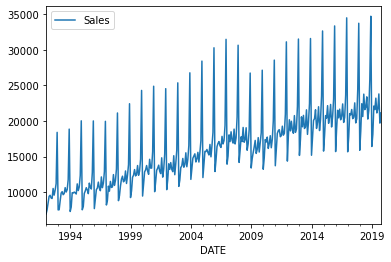

In [10]:
data.plot()
plt.show()

### split the data into xtrain , xtest

In [11]:
data.shape

(334, 1)

In [12]:
test_size=18
test_index=data.shape[0]-test_size

In [13]:
test_index

316

In [14]:
#data.iloc[r,c]
train=data.iloc[:test_index,:]
test=data.iloc[test_index:,:]

In [15]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [16]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


### normalization

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler=MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [19]:
train_scaled=scaler.transform(train)
test_scaled=scaler.transform(test)

In [20]:
train_scaled

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

In [21]:
test_scaled

array([[0.61087714],
       [0.53191258],
       [0.54389341],
       [0.59697212],
       [0.4836625 ],
       [0.52770113],
       [0.68592071],
       [1.00813244],
       [0.34388615],
       [0.40647691],
       [0.55021057],
       [0.53220302],
       [0.59040081],
       [0.51499419],
       [0.53645077],
       [0.61185739],
       [0.46314987],
       [0.51463114]])

In [ ]:
#scaler.inverse_transform(train_scaled)

### create x and y , we want to feed input(12 months) to predict the month number 13,that why length =12

In [22]:
length=12

In [23]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [24]:
generator=TimeseriesGenerator(train_scaled,train_scaled,length=12,batch_size=1)

In [25]:
generator[0]

(array([[[0.        ],
         [0.02127505],
         [0.05580163],
         [0.08942056],
         [0.09512053],
         [0.08146965],
         [0.07860151],
         [0.12979233],
         [0.09566512],
         [0.1203892 ],
         [0.15426227],
         [0.41595266]]]),
 array([[0.02047633]]))

In [26]:
x,y=generator[0]

In [27]:
x

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [28]:
x.shape

(1, 12, 1)

In [29]:
y.shape

(1, 1)

### Create LSTM model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [31]:
n_features=1

model=Sequential()

model.add(LSTM(50,activation="relu", batch_input_shape=(None,12,1),return_sequences=True))
model.add(LSTM((1),return_sequences=False))

model.compile(optimizer="adam",loss="mse")

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 1)                 208       
                                                                 
Total params: 10,608
Trainable params: 10,608
Non-trainable params: 0
_________________________________________________________________


In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop=EarlyStopping(patience=2)

In [35]:
model.fit_generator(generator,epochs=20,callbacks=[early_stop])

<ipython-input-35-2b564f01b11f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20,callbacks=[early_stop])


Epoch 1/20
304/304 [==============================] - 3s 6ms/step - loss: 0.0207
Epoch 2/20
304/304 [==============================] - 2s 5ms/step - loss: 0.0183
Epoch 3/20
304/304 [==============================] - 1s 5ms/step - loss: 0.0179
Epoch 4/20
304/304 [==============================] - 1s 5ms/step - loss: 0.0165
Epoch 5/20
304/304 [==============================] - 1s 5ms/step - loss: 0.0139
Epoch 6/20
304/304 [==============================] - 1s 5ms/step - loss: 0.0080
Epoch 7/20
304/304 [==============================] - 1s 5ms/step - loss: 0.0034
Epoch 8/20
304/304 [==============================] - 1s 5ms/step - loss: 0.0023
Epoch 9/20
304/304 [==============================] - 1s 5ms/step - loss: 0.0013
Epoch 10/20
304/304 [==============================] - 1s 5ms/step - loss: 0.0011
Epoch 11/20
304/304 [==============================] - 1s 5ms/step - loss: 0.0011
Epoch 12/20
304/304 [==============================] - 1s 5ms/step - loss: 0.0011
Epoch 13/20
304/304 [====

### evaluate our model

In [36]:
test_prediction=[]
first_batch=train_scaled[-12:]
batch=first_batch.reshape(1,12,1)

for i in range(len(test)):
    
    current_pred=model.predict(batch)[0]
    test_prediction.append(current_pred)
    batch=np.append(batch[:,1:,:],[[current_pred]],axis=1)

In [37]:
test_prediction

[array([0.52375096], dtype=float32),
 array([0.4884712], dtype=float32),
 array([0.4943059], dtype=float32),
 array([0.55392903], dtype=float32),
 array([0.47605714], dtype=float32),
 array([0.49320468], dtype=float32),
 array([0.65106577], dtype=float32),
 array([0.9650098], dtype=float32),
 array([0.3707572], dtype=float32),
 array([0.4487904], dtype=float32),
 array([0.5538997], dtype=float32),
 array([0.4978387], dtype=float32),
 array([0.51614267], dtype=float32),
 array([0.49036273], dtype=float32),
 array([0.494652], dtype=float32),
 array([0.5398872], dtype=float32),
 array([0.48357856], dtype=float32),
 array([0.49761945], dtype=float32)]

In [38]:
true_pred=scaler.inverse_transform(test_prediction)

In [39]:
true_pred

array([[21364.19646502],
       [20392.45100832],
       [20553.16194868],
       [22195.42122698],
       [20050.51791978],
       [20522.82979035],
       [24870.95548105],
       [33518.23016644],
       [17150.13610673],
       [19299.48281121],
       [22194.61348581],
       [20650.46931195],
       [21154.63360167],
       [20444.55113435],
       [20562.69477201],
       [21808.65275764],
       [20257.68793201],
       [20644.43013334]])

In [40]:
test["pred"]=true_pred

/Users/vineet/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [41]:
test

,Sales,pred
DATE,,
2018-05-01,23764,21364.196465
2018-06-01,21589,20392.451008
2018-07-01,21919,20553.161949
2018-08-01,23381,22195.421227
2018-09-01,20260,20050.517920
2018-10-01,21473,20522.829790
2018-11-01,25831,24870.955481
2018-12-01,34706,33518.230166
2019-01-01,16410,17150.136107


<AxesSubplot:xlabel='DATE'>

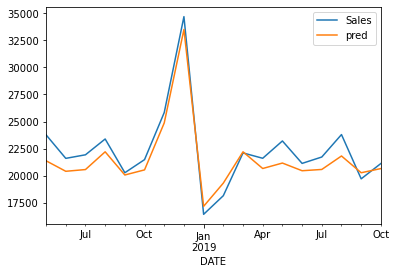

In [42]:
test.plot()

### create another LSTM with full data and predict the future forecast

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(data)

In [44]:
data_scaled

array([[0.        ],
       [0.02110343],
       [0.05535148],
       [0.08869922],
       [0.09435321],
       [0.08081245],
       [0.07796744],
       [0.12874532],
       [0.0948934 ],
       [0.11941804],
       [0.15301786],
       [0.41259723],
       [0.02031115],
       [0.02110343],
       [0.06583117],
       [0.10548113],
       [0.11253961],
       [0.09712619],
       [0.1028522 ],
       [0.13288678],
       [0.11073898],
       [0.1227312 ],
       [0.17365313],
       [0.42901901],
       [0.01231634],
       [0.03471622],
       [0.10742581],
       [0.10555315],
       [0.11059493],
       [0.10641746],
       [0.10072746],
       [0.15193748],
       [0.11808557],
       [0.13656007],
       [0.19504466],
       [0.47097378],
       [0.02088735],
       [0.03684097],
       [0.10360847],
       [0.11632094],
       [0.13259867],
       [0.12111063],
       [0.10249208],
       [0.15579084],
       [0.13583982],
       [0.12608038],
       [0.20934169],
       [0.470

In [45]:
data_generator=TimeseriesGenerator(data_scaled,data_scaled,length=12,batch_size=1)

In [46]:
n_features=1

model2=Sequential()

model2.add(LSTM(50,activation="relu", batch_input_shape=(None,12,1)))
model2.add(Dense(1))

model2.compile(optimizer="adam",loss="mse")
model2.fit_generator(data_generator,epochs=8)

<ipython-input-46-01291679617f>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model2.fit_generator(data_generator,epochs=8)


Epoch 1/8
322/322 [==============================] - 2s 3ms/step - loss: 0.0266
Epoch 2/8
322/322 [==============================] - 1s 3ms/step - loss: 0.0188
Epoch 3/8
322/322 [==============================] - 1s 3ms/step - loss: 0.0183
Epoch 4/8
322/322 [==============================] - 1s 3ms/step - loss: 0.0164
Epoch 5/8
322/322 [==============================] - 1s 3ms/step - loss: 0.0123
Epoch 6/8
322/322 [==============================] - 1s 3ms/step - loss: 0.0074
Epoch 7/8
322/322 [==============================] - 1s 3ms/step - loss: 0.0031
Epoch 8/8
322/322 [==============================] - 1s 3ms/step - loss: 0.0033


In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 1)                 208       
                                                                 
Total params: 10,608
Trainable params: 10,608
Non-trainable params: 0
_________________________________________________________________


In [48]:
d=data_scaled[-12:].reshape(1,12,1)

In [49]:
model2.predict(d)

array([[0.7004357]], dtype=float32)

In [50]:
test_prediction2=[]
first_batch2=data_scaled[-12:]
batch2=first_batch2.reshape(1,12,1)

for i in range(12):
    
    current_pred2=model2.predict(batch2)[0]
    test_prediction2.append(current_pred2)
    batch2=np.append(batch2[:,1:,:],[[current_pred2]],axis=1)

In [51]:
model2.predict(data_scaled[-12:].reshape(1,12,1))

array([[0.7004357]], dtype=float32)

In [52]:
true_pred2=scaler.inverse_transform(test_prediction2)

In [53]:
true_pred2

array([[26387.69846296],
       [37140.01584339],
       [16054.71187568],
       [18184.21464634],
       [21545.032866  ],
       [21439.53502369],
       [22945.23738289],
       [21269.20849991],
       [21915.34037209],
       [23777.39441919],
       [20392.70632172],
       [21862.19670916]])

In [54]:
index=pd.date_range(start="2019-11-01",periods=12,freq="MS")

In [55]:
index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [56]:
forecast=pd.DataFrame(true_pred2,index=index,columns=["Sales_Forecast"])

<AxesSubplot:xlabel='DATE'>

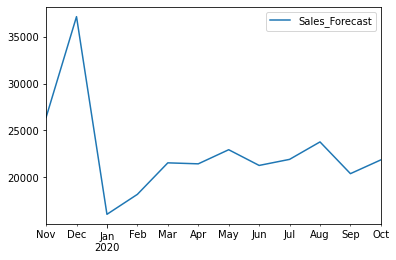

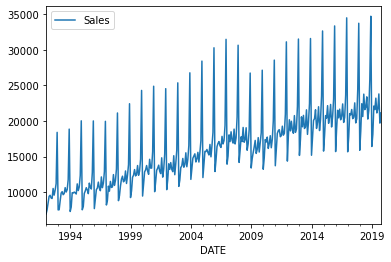

In [57]:
forecast.plot()
data.plot()

<AxesSubplot:xlabel='DATE'>

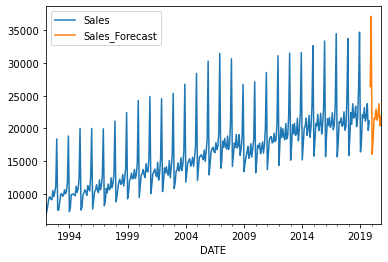

In [58]:
forecast.plot(ax=data.plot())

(584.0, 600.0)

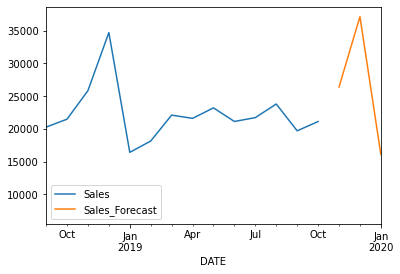

In [59]:
forecast.plot(ax=data.plot())
plt.xlim("2018-09-01","2020-01-01")